In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import matplotlib.pyplot as figure

from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from sklearn import preprocessing
from random import sample
import glob, os 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
from random import sample
from collections import Counter
import pickle

In [2]:
textFile = pd.read_csv("testingDataSet.csv")

In [41]:
len(textFile)

197147

In [3]:
textFile.head()

,0,1,2,3,4,5,6,7,8,9,...,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [4]:
labels = pd.read_csv("testingLabels.csv")

In [5]:
testDataSet = textFile.copy()

In [6]:
testDataSet['LABELS'] = labels.LABELS

In [7]:
testDataSet.head()

,0,1,2,3,4,5,6,7,8,9,...,1586,1587,1588,1589,1590,1591,1592,1593,1594,LABELS
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,-1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,4


In [8]:
testDataSet.LABELS.value_counts()

 7    33073
 1    32939
 3    32904
 0    32811
-1    32715
 4    32705
Name: LABELS, dtype: int64

In [9]:
class0 =testDataSet[testDataSet['LABELS'] == 0]
class0 = class0.drop(['LABELS'],axis = 1)

In [10]:
class1 = testDataSet[testDataSet['LABELS'] == 1]
class1 = class1.drop(['LABELS'],axis = 1)

In [11]:
classnegative1 = testDataSet[testDataSet['LABELS'] == -1]
classnegative1 = classnegative1.drop(['LABELS'],axis = 1)

In [12]:
class3 = testDataSet[testDataSet['LABELS'] == 3]
class3 = class3.drop(['LABELS'],axis = 1)

In [13]:
class4 = testDataSet[testDataSet['LABELS'] == 4]
class4 = class4.drop(['LABELS'],axis = 1)

In [14]:
class7 = testDataSet[testDataSet['LABELS'] == 7]
class7 = class7.drop(['LABELS'],axis = 1)

In [15]:
file = open('LRModelLargeData', 'rb')
model = pickle.load(file)

In [16]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [17]:
def find_majority(k):
    myMap = {}
    maxValue = 0
    maximum = [] # (occurring element, occurrences)
    for n in k:
        if n in myMap:
            myMap[n] += 1
        else:
            myMap[n] = 1

        # Keep track of maximum on the go
    for n in myMap:
        if myMap[n] >= maxValue:
            maxValue = myMap[n]
            maximum.append(n)

    return maximum

In [56]:
predictedLabels = []
actual_labels = []

In [60]:
len(predictedLabels)


197147

In [61]:
len(actual_labels)

197147

In [59]:
classes = [classnegative1, class0, class1, class3, class4, class7 ]
classNo = [-1, 0, 1, 3, 4, 7]
i = 0
for clas in classes:
    findPredictedLabels(clas, 100, classNo[i])
    i += 1
    
    

In [54]:
# unknownLabels = []
def findPredictedLabels(clas, batchSize, classNo):
    map = {}
    for batch in chunker(clas,100):     
        predictLabel = model.predict(batch) 
        majorityValue = find_majority(predictLabel)
        if len(majorityValue)> 1: 
            if 'U' not in map:
                map['U'] = 1
            else:
                map['U'] += 1

            for i in range(len(batch)):
                predictedLabels.append('U')


    #     elif majorityValue[0] == 7:
    #         for i in range(len(batch)):
    #             predictedLabels.append(str(majorityValue[0])) 

        else:
            if str(majorityValue[0]) not in map:            
                map[str(majorityValue[0])] = 1
            else:    
                map[str(majorityValue[0])] += 1
            for i in range(len(batch)):            
                predictedLabels.append(str(majorityValue[0]))
            
# size = len(class0) - len(unknownLabels) 

    for i in range(len(clas)):
        actual_labels.append(str(classNo))       
    
    
    

In [42]:
map

{'7': 216, 'U': 115}

In [62]:
from sklearn.metrics import accuracy_score
print("%.2f" %accuracy_score(actual_labels ,predictedLabels))

0.82


In [63]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['-1', '0','1','3' ,'4', '7','U']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels())

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center",fontsize = 20,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Normalized confusion matrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


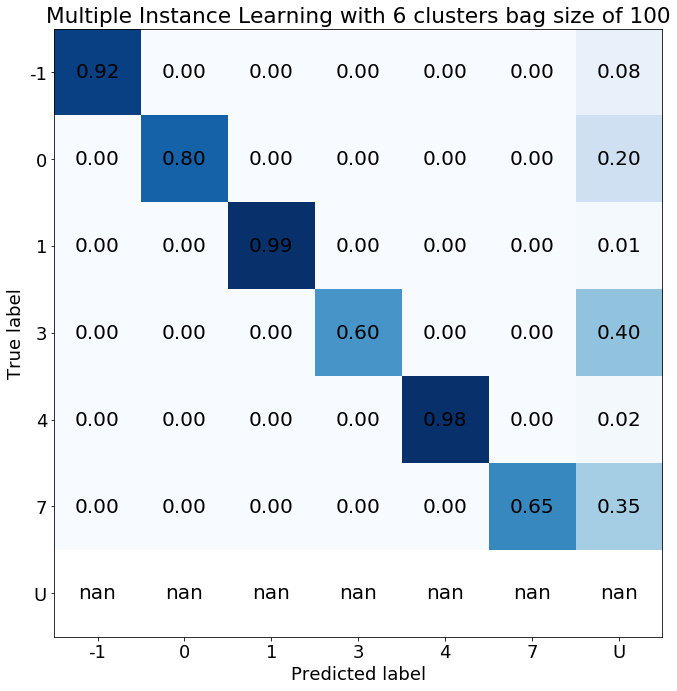

In [64]:
plt.rcParams.update({'font.size': 18})
plot_confusion_matrix(actual_labels, predictedLabels, classes= ['-1', '0','1', '3' ,'4', '7','U'], normalize=True,
                      title='Multiple Instance Learning with 6 clusters bag size of 100')

In [65]:
prefTestData = pd.read_csv('prefixesTestSet.csv')

In [70]:
prefTestData.head()

,0,1,2,3,4,5,6,7,8,9,...,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594
23971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
28605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
18346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
8350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [69]:
prefTestData = prefTestData.sample(frac=1,random_state= 367)

In [73]:
len(prefTestData)

40000

In [71]:
map = {}
for batch in chunker(prefTestData,100):     
    predictLabel = model.predict(batch) 
    majorityValue = find_majority(predictLabel)
    if len(majorityValue)> 1: 
        if 'U' not in map:
            map['U'] = 1
        else:
            map['U'] += 1
            
        for i in range(len(batch)):
            predictedLabels.append('U')
            
            
#     elif majorityValue[0] == 7:
#         for i in range(len(batch)):
#             predictedLabels.append(str(majorityValue[0])) 
                
    else:
        if str(majorityValue[0]) not in map:            
            map[str(majorityValue[0])] = 1
        else:    
            map[str(majorityValue[0])] += 1
        for i in range(len(batch)):            
            predictedLabels.append(str(majorityValue[0]))
            
# size = len(class0) - len(unknownLabels) 


In [79]:
valuesMap = list(map.values())
valuesMap

[264, 106, 12, 18]

In [81]:
labels = list(map.keys())
labels

['U', '7', '3', '4']

In [82]:
valuesMap = [x/400 for x in valuesMap]

<BarContainer object of 4 artists>

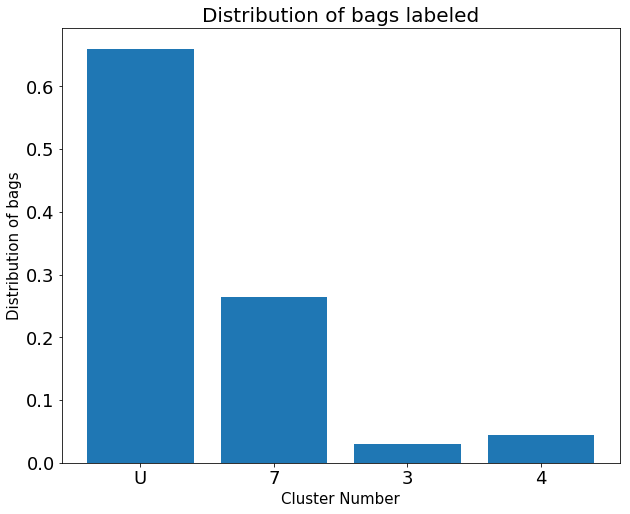

In [89]:
plt.figure(figsize=(10,8))
plt.title('Distribution of bags labeled', fontsize=20)
plt.xlabel('Cluster Number', fontsize=15)
plt.ylabel('Distribution of bags', fontsize=15)
plt.bar(labels, valuesMap)